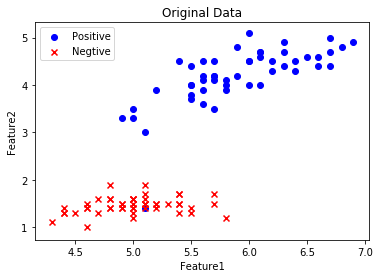

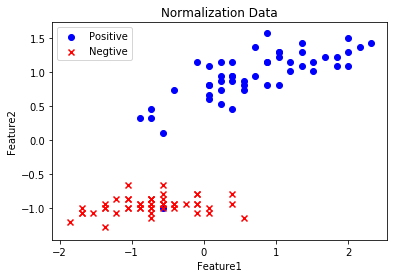

(array([ 2,  4,  6,  8,  9, 13, 15, 16, 18, 19, 29, 30, 32, 33, 37, 38, 39,
       41, 42, 43, 44, 45, 47, 48, 49, 53, 54, 59, 63, 64, 65, 66, 67, 68,
       69, 70, 72, 76, 77, 80, 81, 82, 84, 85, 88, 89, 95, 97, 98],
      dtype=int64),)
 0 update, number of fault classification is: 49
no equal
(array([ 2,  4,  6,  8,  9, 13, 15, 16, 18, 19, 29, 30, 32, 33, 37, 38, 39,
       41, 42, 43, 44, 45, 47, 48, 49, 53, 54, 59, 63, 64, 65, 66, 67, 68,
       69, 70, 72, 76, 77, 80, 81, 82, 84, 85, 88, 89, 95, 97, 98],
      dtype=int64),)
(array([ 6,  9, 42, 47, 49, 53, 54, 56, 59, 63, 64, 65, 66, 67, 68, 69, 70,
       72, 74, 75, 76, 77, 80, 81, 82, 84, 85, 88, 89, 92, 93, 95, 97, 98],
      dtype=int64),)
 1 update, number of fault classification is: 34
no equal
(array([ 6,  9, 42, 47, 49, 53, 54, 56, 59, 63, 64, 65, 66, 67, 68, 69, 70,
       72, 74, 75, 76, 77, 80, 81, 82, 84, 85, 88, 89, 92, 93, 95, 97, 98],
      dtype=int64),)
(array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61

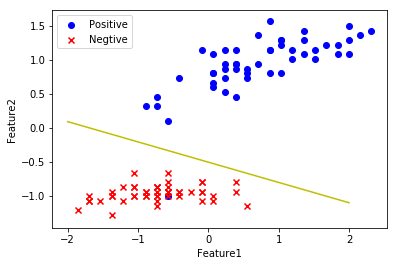

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data = pd.read_csv("data1.csv", header=None)
# X = data.iloc[:,:2].values
# y = data.iloc[:,-1].values

def readData(file):
    rawdata = pd.read_csv(file)
    data = rawdata.values
#     x0 = np.ones((data.shape[0], 1))
#     data = np.c_[x0, data]
    n, m = data.shape
    return data[:,:-1], data[:, -1], n, m

def drawdata(X1, X2, X3, X4,title):
    plt.scatter(X1, X2, color='blue', marker='o', label='Positive')
    plt.scatter(X3, X4, color='red', marker='x', label='Negtive')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()

def pla(X, y, n, m):
    #X add X0 to ones
    X = np.hstack((np.ones((n,1)), X))
    #initial w
    w = np.random.randn(m, 1)

    for i in range(n):
        s = np.dot(X, w)
        y_pred = np.ones_like(y)
        loc_n = np.where(s < 0)[0]
        y_pred[loc_n] = -1
        compared = np.where(y != y_pred)
        print(compared)
        num_fault = len(compared[0])
        print('%2d update, number of fault classification is: %2d' %(i, num_fault))
        if num_fault == 0:
            break
        else:
            print("no equal")
            print(compared)
            t = compared[0][0]
            w += y[t] * X[t,:].reshape((3,1))

    x1 = -2
    y1 = -1 / w[2] *(w[0] * 1 + w[1] * x1)

    x2 = 2
    y2 = -1 / w[2] * (w[0]* 1 + w[1] * x2)
    plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
    plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negtive')
    plt.plot([x1,x2], [y1, y2], 'y')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.legend(loc='upper left')

    plt.show()

X, y, n, m = readData('data1.csv')
drawdata(X[:50, 0], X[:50, 1], X[50:, 0], X[50:, 1], "Original Data")

u = np.mean(X, axis=0)
v = np.std(X, axis=0)
X = (X - u) / v
drawdata(X[:50, 0], X[:50, 1], X[50:, 0], X[50:, 1], "Normalization Data")
pla(X, y, n, m)